## 05 - 02 Exploratory Data Analysis using Pandas
Based on the concepts that we have built in the last couple of modules, we will explore the imdb dataset but before we do that, let's first look at ways of loading the datasets as pandas dataframe.

### 05 - 02.01 Loading Data
You can read data from a CSV file using the read_csv function. By default, it assumes that the fields are comma-separated.
Pandas supports following file formats:

|Function| Description|
|:---|:---|
|read_csv | Load delimited data from a file, URL, or file-like object. Use comma as default delimiter|
|read_table | Load delimited data from a file, URL, or file-like object. Use tab ('\t') as default delimiter|
|read_fwf | Read data in fixed-width column format (that is, no delimiters)|
|read_clipboard | Version of read_table that reads data from the clipboard. Useful for converting tables from web pages.|

For most of the analysis work, you will be loading the csv, tsv or some delimited files. We will only look at `read_csv` function in this example.


In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

>Lets load the cast, release-dates and titles dataset.

> This might take sometime.

In [5]:
%%time
cast = pd.DataFrame.from_csv('./sample_datasets/cast.csv', index_col=None)
release_dates = pd.read_csv('./sample_datasets/release_dates.csv', index_col=None,
                            parse_dates=['date'], infer_datetime_format=True)
titles = pd.DataFrame.from_csv('./sample_datasets/titles.csv', index_col=None)

CPU times: user 6.27 s, sys: 778 ms, total: 7.05 s
Wall time: 7.13 s


Lets look at some of the contents of these dataframes

In [9]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


> The `n` in the cast dataframe tells us the rank or the order of the leading roles.

In [11]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


In [13]:
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,Gaiking II,2011


Do you know how many movies released since you were born?

In [40]:
my_birth_year = 1990
len(titles[(titles['year']>my_birth_year) & (titles['year']<2017)])

113711

Lets plot how many movies released every year since you were born

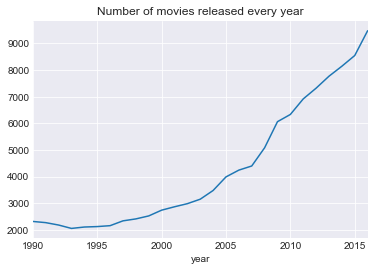

In [55]:
titles.groupby('year').size().loc[my_birth_year:2016].plot(title="Number of movies released every year")

Pandas provides matplotlib based plotting as a part of dataframe. To plot any dataframe (with *plottable data*) you can simply use `.plot()`.

Ofcourse we can also do this manually using matplotlib's pyplot as well (which is actually what pandas uses under the cover)

(1990, 2016)

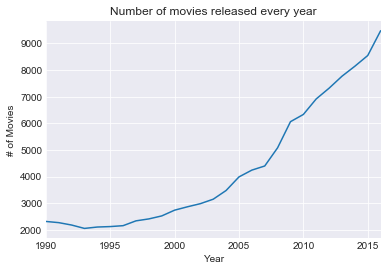

In [52]:
fig, ax = plt.subplots()
ax.plot(titles.groupby('year').size().loc[my_birth_year:2016])
ax.set_xlabel("Year")
ax.set_ylabel("# of Movies")
ax.set_title("Number of movies released every year")
ax.set_xlim(1990, 2016)

Hmm.. How about the total number of movies released every decade?

This will involve a little math. We know that the `titles` dataframe has a `year` column which, obviously, has the year when a movie was released.

To count the occurence of something, we can use the `value_counts` method. 

So now, all we need to do is pass the *decade* as key to the `titles` dataframe and apply the `value_counts` method. 

Let's see how to do this

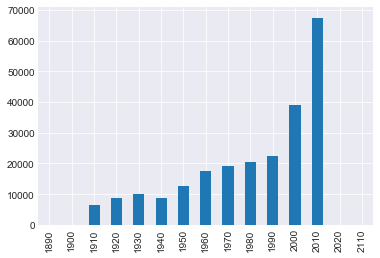

In [170]:
(titles['year'] // 10 * 10).value_counts().sort_index().plot(kind='bar')

How many movies did a *movie star* star in?

In [168]:
movie_star = "Matt Damon"
len(cast[cast['name'] == movie_star])

62

What are the 10 most common name of the roles played by characters?

In [81]:
cast['character'].value_counts().head(10)

Himself        20457
Dancer         12146
Extra          11271
Reporter        8270
Doctor          7524
Student         7427
Policeman       6950
Party Guest     6888
Nurse           6760
Bartender       6698
Name: character, dtype: int64

What are the 10 most common movie names?

In [169]:
titles['title'].value_counts().head(10)

Hamlet                  20
Carmen                  16
Macbeth                 15
The Outsider            12
Maya                    12
Othello                 11
The Three Musketeers    11
Freedom                 11
Temptation              11
Honeymoon               10
Name: title, dtype: int64

Similarly, you can find who has been the most in the movies

In [82]:
cast['name'].value_counts().head(10)

Bess Flowers       824
Herman Hack        689
Sam (II) Harris    662
Lee Phelps         623
Harold Miller      619
Frank O'Connor     610
Franklyn Farnum    565
Tom London         562
Larry Steers       557
Frank Ellis        545
Name: name, dtype: int64

Lets find the years when *The Bourne* series were released.

In [83]:
titles[titles['title'].str.contains("Bourne")].sort_values('year')

,title,year
72237,The Bourne Identity,2002
107314,The Bourne Supremacy,2004
78822,The Bourne Ultimatum,2007
3309,The Mel Bourne Ultimatum,2009
34759,The Bourne Legacy,2012
38495,Jason Bourne,2016


Lets find the movies when *Matt Damon* was *Jason Bourne*

In [91]:
matt_jbourne = cast[(cast['title'].str.contains("Bourne")) & 
                    (cast['name'].str.contains("Matt Damon"))]
matt_jbourne

,title,year,name,type,character,n
514526,Jason Bourne,2016,Matt Damon,actor,Jason Bourne,1.0
514546,The Bourne Identity,2002,Matt Damon,actor,Bourne,1.0
514547,The Bourne Supremacy,2004,Matt Damon,actor,Jason Bourne,1.0
514548,The Bourne Ultimatum,2007,Matt Damon,actor,Jason Bourne,1.0


So, How many movies do you think is released every year starring Matt Damon?

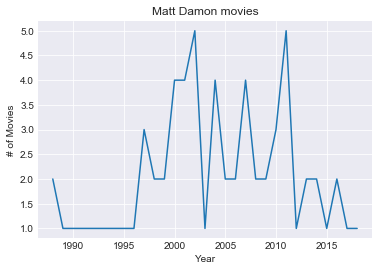

In [172]:
fig, ax = plt.subplots()
ax.plot(cast[cast['name'] == "Matt Damon"].groupby('year').size())
ax.set_xlabel("Year")
ax.set_ylabel("# of Movies")
ax.set_title("Matt Damon movies")

And how about the ranks at which *Matt Damon* stars in the movies?

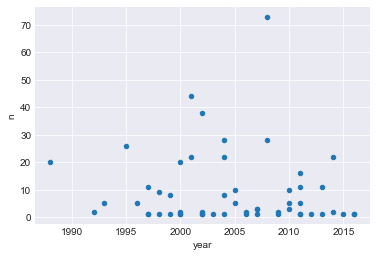

In [177]:
matt_movies = cast[cast.name == 'Matt Damon'].sort_values('year')
matt_movies = matt_movies[matt_movies['n'].notnull()]
# For scatter plots, you can simply pass the column
# names for the x and y argument
matt_movies.plot(x='year', y='n', kind='scatter')

So how many leading roles?

In [180]:
matt_movies = cast[cast.name == 'Matt Damon'].sort_values('year')
matt_movies[matt_movies['n'] == 1]['n'].value_counts()

1.0    20
Name: n, dtype: int64

Lets see how many people were casted in all these *Jason Bourne* movies

In [101]:
%%time
cast[(cast['title'].str.contains("Bourne"))].groupby(['year', 'title']).size()

CPU times: user 2.33 s, sys: 26 ms, total: 2.35 s
Wall time: 2.37 s


year  title                   
2002  The Bourne Identity          56
2004  The Bourne Supremacy         49
2007  The Bourne Ultimatum         70
2009  The Mel Bourne Ultimatum      8
2012  The Bourne Legacy           124
2016  Jason Bourne                251
dtype: int64

Among these casts, how many were actors and actresses?

In [111]:
%%time 
cast[(cast['title'].str.contains("Bourne"))].groupby(['year', 'title', 'type']).size()

CPU times: user 2.32 s, sys: 22.4 ms, total: 2.34 s
Wall time: 2.34 s


year  title                     type   
2002  The Bourne Identity       actor       50
                                actress      6
2004  The Bourne Supremacy      actor       38
                                actress     11
2007  The Bourne Ultimatum      actor       59
                                actress     11
2009  The Mel Bourne Ultimatum  actor        5
                                actress      3
2012  The Bourne Legacy         actor       87
                                actress     37
2016  Jason Bourne              actor      184
                                actress     67
dtype: int64

Lets plot the above and see the total number of roles based on gender

type  actor  actress
year                
2002     50        6
2004     38       11
2007     59       11
2009      5        3
2012     87       37
2016    184       67


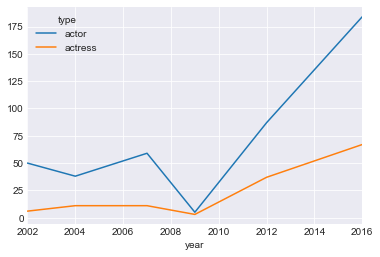

In [129]:
jason_cast = cast[(cast['title'].str.contains("Bourne"))]
jason_cast_gender = jason_cast[['year', 'type']].groupby(['year', 'type']).size().unstack()
print(jason_cast_gender)
jason_cast_gender.plot()

Lets find out the entire cast of the *The Bourne Ultimatum* and print just the top 10 leads

In [89]:
cast[cast['title'] == "The Bourne Ultimatum"].sort_values(['n']).head(10)

,title,year,name,type,character,n
514548,The Bourne Ultimatum,2007,Matt Damon,actor,Jason Bourne,1.0
3525027,The Bourne Ultimatum,2007,Julia Stiles,actress,Nicky Parsons,2.0
2160381,The Bourne Ultimatum,2007,David Strathairn,actor,Noah Vosen,3.0
827328,The Bourne Ultimatum,2007,Scott Glenn,actor,Ezra Kramer,4.0
452157,The Bourne Ultimatum,2007,Paddy Considine,actor,Simon Ross,5.0
1842219,The Bourne Ultimatum,2007,Edgar (IV) Ram?rez,actor,Paz,6.0
717336,The Bourne Ultimatum,2007,Albert Finney,actor,Dr. Albert Hirsch,7.0
2510131,The Bourne Ultimatum,2007,Joan Allen,actress,Pam Landy,8.0
778203,The Bourne Ultimatum,2007,Tom Gallop,actor,Tom Cronin,9.0
1095446,The Bourne Ultimatum,2007,Corey Johnson,actor,Wills,10.0


Lets see in what months Matt Damon's movies are most often released in the USA.

- First, find the year and the title of unique movies starring Matt Damon were released

In [132]:
matt_movies = cast[cast['name'] == "Matt Damon"][['title', 'year']].drop_duplicates()

Now we have to re-index the `release_dates` dataframe with `title` and `year` keys

In [143]:
rel_dts = release_dates.set_index(['title', 'year']).sort_index()

- Now, the 'month' part is present in `date` column present in `release_dates` dataframe so we have to combine the `cast` and `release_dates` dataframes for Matt Damon's movies by some common index (in our case, we will use the common index as `title` and `year` since it is present in both the dataframes)

In [144]:
matt_movie_releases = matt_movies.join(rel_dts, on=['title', 'year'])

- We only want movies released in the USA

In [145]:
matt_movie_releases = matt_movie_releases[matt_movie_releases['country'] == "USA"]

- Now lets plot the `month` part.

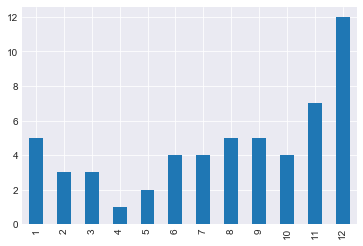

In [146]:
matt_movie_releases['date'].dt.month.value_counts().sort_index().plot(kind='bar')

Cool, Now lets see when the Bourne movie series were released in different countries.
> Since there are is a huge list of countries, lets just select "USA", "UK" and "India"

In [154]:
countries = ["USA", "UK", "Australia"]
matt_movie_releases = matt_movies.join(rel_dts, on=['title', 'year'])
matt_movie_countries = matt_movie_releases[matt_movie_releases['country'].str.contains('|'.join(countries))]
matt_movie_countries.set_index(['title', 'country'])[['date']].unstack()

date                      
country                           Australia         UK        USA
title                                                            
All the Pretty Horses            2001-05-10 2001-05-25 2000-12-25
Chasing Amy                      1997-07-03 1997-11-14 1997-04-18
Che: Part Two                    2009-10-01 2009-02-20 2009-01-24
Confessions of a Dangerous Mind  2003-07-24 2003-03-14 2003-01-24
Contagion                        2011-10-20 2011-10-21 2011-09-09
Courage Under Fire               1996-09-12 1996-10-04 1996-07-12
Dogma                            2000-02-03 1999-12-26 1999-11-12
Elysium                          2013-08-15 2013-08-21 2013-08-09
EuroTrip                         2004-08-12 2004-06-25 2004-02-20
Field of Dreams                  1989-08-31 1989-11-24 1989-05-05
Finding Forrester                2001-03-29 2001-02-23 2001-01-12
Gake no ue no Ponyo              2009-08-27 2010-02-12 2009-08-14
Geronimo: An American Legend     1994-05-26 1994-10-14 1993-12-10
Gerry                                   NaT 2003-08-22        NaT
Glory Daze                              NaT        NaT 1996-09-27
Good Will Hunting                1998-03-12 1998-03-06 1998-01-09
Green Zone                       2010-03-11 2010-03-12 2010-03-12
Happy Feet Two                   2011-12-26 2011-12-02 2011-11-18
Hereafter                               NaT 2011-01-28 2010-10-22
Interstellar                     2014-11-06 2014-11-07 2014-11-07
Invictus                         2010-01-21 2010-02-05 2009-12-11
Jason Bourne                     2016-07-28 2016-07-27 2016-07-29
Jay and Silent Bob Strike Back   2002-01-31 2001-11-30 2001-08-24
Jersey Girl                      2004-08-12 2004-06-18 2004-03-26
Margaret                         2012-06-14        NaT        NaT
Mystic Pizza                     1989-08-03 1990-01-05 1988-10-21
Ocean's Eight                    2018-06-21        NaT 2018-06-08
Ocean's Eleven                   2002-01-10 2002-02-15 2001-12-07
Ocean's Thirteen                 2007-06-14 2007-06-08 2007-06-08
Ocean's Twelve                   2004-12-09 2005-02-04 2004-12-10
Promised Land                    2013-05-02 2013-04-19 2013-01-04
Rounders                         1999-01-28 1998-11-20 1998-09-11
Saving Private Ryan              1998-11-19 1998-09-11 1998-07-24
School Ties                      1993-06-10        NaT 1992-09-18
Spirit: Stallion of the Cimarron 2002-06-20 2002-07-05 2002-05-24
Stuck on You                     2004-02-12 2004-01-02 2003-12-12
Suburbicon                              NaT        NaT 2017-11-03
Syriana                          2006-02-16 2006-03-03 2005-12-09
The Adjustment Bureau                   NaT 2011-03-04 2011-03-04
The Bourne Identity              2002-08-22 2002-09-06 2002-06-14
The Bourne Supremacy             2004-08-26 2004-08-13 2004-07-23
The Bourne Ultimatum             2007-08-30 2007-08-17 2007-08-03
The Brothers Grimm               2005-11-24 2005-11-04 2005-08-26
The Departed                     2006-10-12 2006-10-06 2006-10-06
The Good Mother                  1989-05-04 1989-02-17 1988-11-04
The Good Shepherd                2007-02-15 2007-02-23 2006-12-22
The Great Wall                   2017-02-16 2017-02-17 2017-02-17
The Informant!                   2009-12-03 2009-11-20 2009-09-18
The Legend of Bagger Vance       2001-02-08 2001-02-23 2000-11-03
The Majestic                     2002-05-16 2002-05-24 2001-12-21
The Martian                      2015-09-30 2015-09-30 2015-10-02
The Monuments Men                2014-03-13 2014-02-14 2014-02-07
The Rainmaker                    1998-01-22 1998-04-03 1997-11-21
The Talented Mr. Ripley          2000-02-24 2000-02-25 1999-12-25
The Zero Theorem                 2014-05-15 2014-03-14        NaT
Titan A.E.                       2001-01-04 2000-07-28 2000-06-16
True Grit                        2011-01-26 2011-02-11 2010-12-22
We Bought a Zoo                  2011-12-26 2012-03-16 2011-12-23
Youth Without

> To match the `country` column against all the elements of the list, we use the `|` (OR) operator. It is considered as a Regular Expression.

We can also create a `Pivot` table to provide the above output.
> - The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.
> - Think of it as a multi-dimensional GroupBy function

In [155]:
countries = ["USA", "UK", "Australia"]
matt_movie_releases = matt_movies.join(rel_dts, on=['title', 'year'])
matt_movie_countries = matt_movie_releases[matt_movie_releases['country'].str.contains('|'.join(countries))]
matt_movie_countries.pivot(index='title', columns='country', values='date')

country,Australia,UK,USA
title,,,
All the Pretty Horses,2001-05-10,2001-05-25,2000-12-25
Chasing Amy,1997-07-03,1997-11-14,1997-04-18
Che: Part Two,2009-10-01,2009-02-20,2009-01-24
Confessions of a Dangerous Mind,2003-07-24,2003-03-14,2003-01-24
Contagion,2011-10-20,2011-10-21,2011-09-09
Courage Under Fire,1996-09-12,1996-10-04,1996-07-12
Dogma,2000-02-03,1999-12-26,1999-11-12
Elysium,2013-08-15,2013-08-21,2013-08-09
EuroTrip,2004-08-12,2004-06-25,2004-02-20


Do you know when are the most *Action* movies released in the USA?

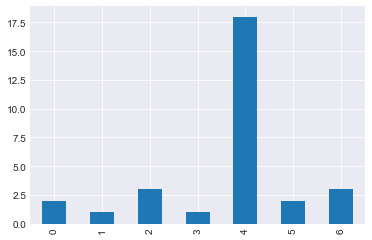

In [188]:
action_usa = release_dates[(release_dates['title'].str.contains('Action')) & 
                           (release_dates['country'] == "USA")]
action_usa['date'].dt.dayofweek.value_counts().sort_index().plot(kind='bar')

In which months are *Matt Damon*'s movies generally released in the USA?

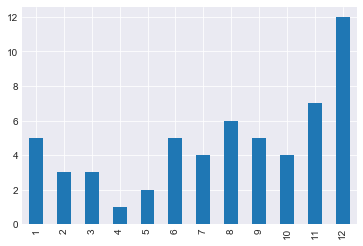

In [190]:
matt_movies = cast[cast['name'] == 'Matt Damon']
matt_movies_usa = matt_movies.merge(release_dates[release_dates.country == 'USA']).sort_values('date')
matt_movies_usa.date.dt.month.value_counts().sort_index().plot(kind='bar')

The above examples should give you some idea about the importance of Pandas and how its high level functions mask the complex computation that is performed on the underlying Numpy arrays.

This is by no means an exhaustive list of all the functions. We have barely scratched the surface. 

> Remember --
> ### The only way to become a master of something is to be really With It! 
So keep practicing and whenever you are stuck:
- Go through the official documentation.
- Enter the object name and Press `<TAB>` or `.?` and Jupyter will show you the docstring.
- Don't trust the examples blindly. Run them, modify them, make mistakes and then rectify them.
- Don't simply copy the StackOverflow or StackExchange or answers from anywhere else. Understand the solution that you find on such sites and then and only then use it in your code.

>If you want more tutorials/ cookbooks, take a look at 

> - [`Pandas own 10 minute to Pandas`](http://pandas.pydata.org/pandas-docs/stable/10min.html#min '10 minutes to pandas')

> - [`Hernan Rojas's Learn Pandas`](https://bitbucket.org/hrojas/learn-pandas 'hrojas's Learn Pandas')

> - [`Pandas Cookbook`](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook 'Pandas Cookbook')

> - [`Greg Reda's Blog`](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/ 'Greg Redas blog on Pandas')
